In [21]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt
import copy # needed for deepcopy of dictionaries

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import metadata
from M194_M220_metadata import *

 
# adding Folder_2 to the system path
import sys
sys.path.insert(0, '../STP_analysis')
# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Set-up variables

home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"


In [8]:
# import reference STeg brain
# import masks from allen_STeg_220429_straight_asr
masks_folder = in_path+"masks/steg_220429_hs_asr/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks_steg = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
        masks_steg[area] = np.load(f)

working on grey
working on CTX
working on OMCi
working on OMCc
working on ACAc
working on aud
working on TH
working on STR
working on CP
working on AMY
working on P
working on PG
working on MB
working on PAG
working on SCm
working on SNr
working on HY
working on CNU
working on TEa
working on ECT
working on VISC
working on AI
working on GU
working on BS
working on HIP


# Visualize reference and test localization

In [9]:
# load reference STeg image
steg_ref = tf.imread(home_dir+"Emily/STP_for_MAPseq/2_fiji_adjusted/OMC_STeg_220429_b2_hand_straightened_asr.tif")

In [13]:
for key in masks_steg:
    masks_steg[key]

In [35]:
viewer = napari.Viewer()

# add reference image
viewer.add_image(
    steg_ref,
    name="STeg reference",
    scale=[2.5,1,1],
    blending="additive"
)


<Image layer 'STeg reference' at 0x17c6b0550>

In [ ]:

# add masks
for mask in masks_steg:
    viewer.add_image(
        masks_steg[mask],
        name=mask,
        scale=[2.5,1,1],
        blending="additive",
        colormap="bop orange",
        opacity=0.5
    )

In [24]:
metadata_inj = metadata[metadata['dataset']=="M220"]
metadata_inj = metadata_inj[metadata_inj['species']=="STeg"].reset_index(drop=True)

metadata_inj

,mice,species,sex,dataset
0,STF4,STeg,female,M220
1,STM5,STeg,male,M220
2,STF6,STeg,female,M220
3,STM7,STeg,male,M220


In [26]:
# add points layers to mark injection sites

# for i in range(metadata_inj.shape[0]):
STF4 = viewer.add_points(name="STF4")
STM5 = viewer.add_points(name="STM5")
STF6 = viewer.add_points(name="STF6")
STM7 = viewer.add_points(name="STM7")

In [34]:
# STF4
# slide 9
# slide 12

viewer.add_points([78,216,214], name="test", edge_color="red")


<Points layer 'test [1]' at 0x17c74e1a0>

In [37]:
metadata_inj

,mice,species,sex,dataset
0,STF4,STeg,female,M220
1,STM5,STeg,male,M220
2,STF6,STeg,female,M220
3,STM7,STeg,male,M220


# Visualizing inj sites

In [81]:
# setting the injection centers

AOMC = np.array([[22,212,217],
        [20,213,230],
        [20,212,221],
        [19,214,223]
        ])
POMC = np.array([[31,216,214],
        [40, 174, 230],
        [39,200,213],
        [31,220,228]
        ])

OMC = np.mean([AOMC, POMC], axis=0)

# range for inj sites, [start, stop]
AOMC_range = np.array([
        [18,39],
        [16,32],
        [12,28],
        [15,27]
        ])

POMC_range = np.array([
        [30,42],
        [32,40],
        [28,44],
        [27,39]
])

OMC_range = [[AOMC_range[i][0], POMC_range[i][1]] for i in range(AOMC_range.shape[0])]
OMC_range = np.array(OMC_range)

In [84]:
AOMC_range.shape

(4, 2)

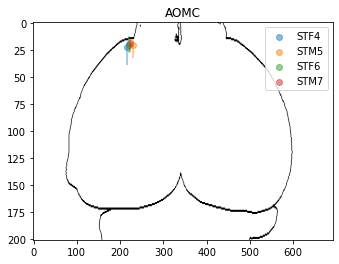

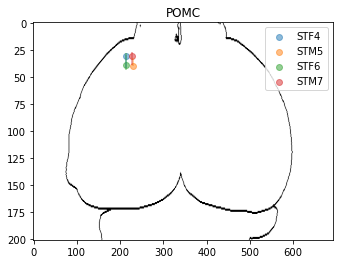

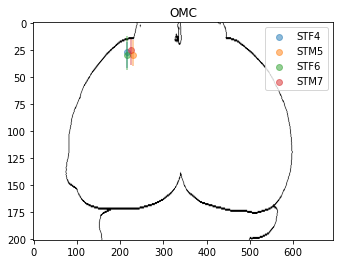

In [85]:
# plotting the injection centers
outline_st = make_boundaries_dict(plot_areas=["grey", "CTX"], mask_dict=masks_steg, view="top")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


plt.imshow(outline_st, cmap="Greys", aspect=2.5)
for i in range(metadata_inj.shape[0]):
    plt.scatter(AOMC[i][2], AOMC[i][0], label=metadata_inj.loc[i,'mice'], alpha=0.5)
    plt.vlines(AOMC[i][2], ymin=AOMC_range[i][0], ymax=AOMC_range[i][1], colors=colors[i], alpha=0.5)
plt.title("AOMC")
plt.legend()
plt.show()

plt.imshow(outline_st, cmap="Greys", aspect=2.5)
for i in range(metadata_inj.shape[0]):
    plt.scatter(POMC[i][2], POMC[i][0], label=metadata_inj.loc[i,'mice'], alpha=0.5)
    plt.vlines(POMC[i][2], ymin=POMC_range[i][0], ymax=POMC_range[i][1], colors=colors[i], alpha=0.5)
plt.title("POMC")
plt.legend()
plt.show()

plt.imshow(outline_st, cmap="Greys", aspect=2.5)
for i in range(metadata_inj.shape[0]):
    plt.scatter(OMC[i][2], OMC[i][0], label=metadata_inj.loc[i,'mice'], alpha=0.5)
    plt.vlines(OMC[i][2], ymin=OMC_range[i][0], ymax=OMC_range[i][1], colors=colors[i], alpha=0.5)
plt.title("OMC")
plt.legend()
plt.show()

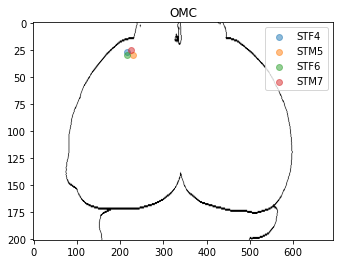

In [78]:
# plotting the injection centers
outline_st = make_boundaries_dict(plot_areas=["grey", "CTX"], mask_dict=masks_steg, view="top")

plt.imshow(outline_st, cmap="Greys", aspect=2.5)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i in range(metadata_inj.shape[0]):
    plt.scatter(OMC[i][2], OMC[i][0], label=metadata_inj.loc[i,'mice'], alpha=0.5)
    # plt.vlines(xm_stats[i]['median'], ymin=zm_stats[i]['q.05'], ymax=zm_stats[i]['q.95'], colors=colors[i], alpha=0.5)
plt.title("OMC")
plt.legend()
plt.show()